# Project: Synthetic Data Generation

## Step 1: Importing libraries 

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    classification_report,
    roc_curve,
)

# Import SMOTE
#pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

## Step 2: Load the dataset into a pandas DataFrame

In [3]:
# Etapa 2: Carregar o dataset
import pandas as pd
diabetes_data = pd.read_csv("diabetes.csv")

## Step 3: Check the data's dimensions

In [4]:
# Etapa 3: Verificar as dimensões dos dados
diabetes_data.shape 

(768, 9)

## Step 4: Preview the data

In [5]:
# Etapa 4: Visualizar as 5 primeiras linhas
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Step 5: Get a summary of the data

In [6]:
# Etapa 5: Obter resumo dos dados
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Step 6: Check for missing data

In [7]:
# Etapa 6: Verificar valores ausentes
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

It looks like our dataset is complete and has zeros for all columns. The  dataset has the following features:

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skinfold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1), where 1 means the patient has diabetes

## Step 7: Analyzing the class distribution for imbalance

Outcome
0    500
1    268
Name: count, dtype: int64


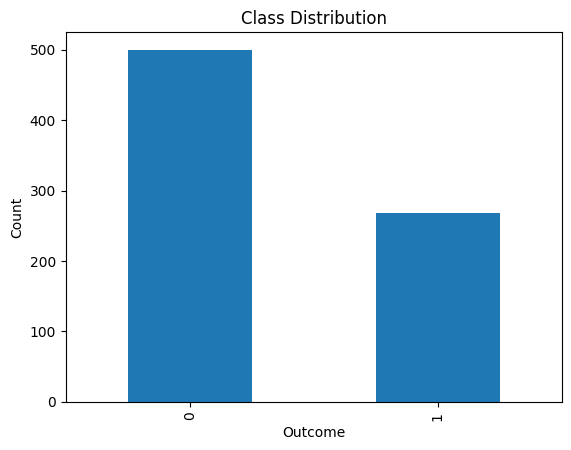

In [8]:
# Etapa 7: Analisar distribuição de classes
class_counts = diabetes_data['Outcome'].value_counts()
print(class_counts)

import matplotlib.pyplot as plt
class_counts.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

## Step 8: Separating features and target

In [9]:
# Etapa 8: Separação de recursos (X) e variável-alvo (y)
x = diabetes_data.drop(columns='Outcome')
y = diabetes_data['Outcome']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)


## Step 9: Standardize features (feature scaling)

In [10]:
# Etapa 9: Padronizar os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Step 10: Apply SMOTE to the training data

In [11]:
# Etapa 10: Aplicar SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)

## Step 11: Visualizing class distribution after SMOTE

Outcome
0    375
1    375
Name: count, dtype: int64


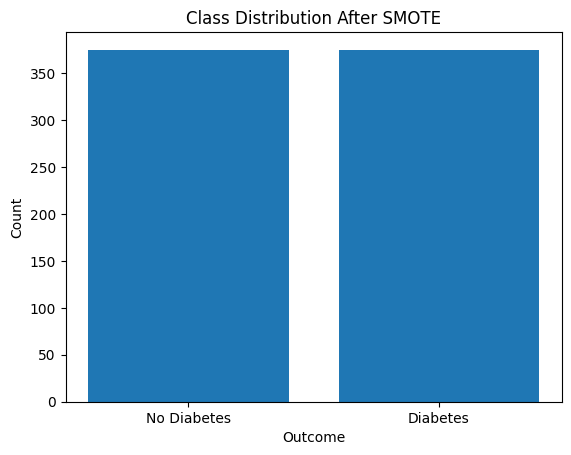

In [12]:
# Etapa 11: Visualizar distribuição após SMOTE
print(pd.Series(y_train_smote).value_counts())

plt.bar(['No Diabetes', 'Diabetes'], pd.Series(y_train_smote).value_counts())
plt.title('Class Distribution After SMOTE')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

## Step 12: Initialize the logistic regression models

In [13]:
# Etapa 12: Inicializar modelos
from sklearn.linear_model import LogisticRegression
model_original = LogisticRegression(solver='liblinear', max_iter=200)
model_smote = LogisticRegression(solver='liblinear', max_iter=200)

## Step 13: Train the models

In [14]:
# Etapa 13: Treinar os modelos
model_original.fit(x_train_scaled, y_train)
model_smote.fit(x_train_smote, y_train_smote)

LogisticRegression(max_iter=200, solver='liblinear')

## Step 14: Make predictions and prepare to evaluate models 

In [15]:
# Etapa 14: Fazer previsões e definir função de avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

## Step 15: Evaluate the model on original data

In [16]:
# Etapa 15: Avaliar modelo original
print("Desempenho do Modelo Original (Dados Desequilibrados):")
evaluate_model(model_original, x_test_scaled, y_test)

Desempenho do Modelo Original (Dados Desequilibrados):
Accuracy: 0.7291666666666666
Precision: 0.6363636363636364
Recall: 0.5223880597014925
ROC AUC: 0.8318805970149253

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       125
           1       0.64      0.52      0.57        67

    accuracy                           0.73       192
   macro avg       0.70      0.68      0.69       192
weighted avg       0.72      0.73      0.72       192



## Step 16: Evaluate the model on SMOTE-augmented data

In [17]:
# Etapa 16: Avaliar modelo com SMOTE
print("\nDesempenho do Modelo com SMOTE (Dados Balanceados):")
evaluate_model(model_smote, x_test_scaled, y_test)


Desempenho do Modelo com SMOTE (Dados Balanceados):
Accuracy: 0.7395833333333334
Precision: 0.6133333333333333
Recall: 0.6865671641791045
ROC AUC: 0.8328358208955224

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79       125
           1       0.61      0.69      0.65        67

    accuracy                           0.74       192
   macro avg       0.72      0.73      0.72       192
weighted avg       0.75      0.74      0.74       192



## Step 17: Visualize and compare model performance

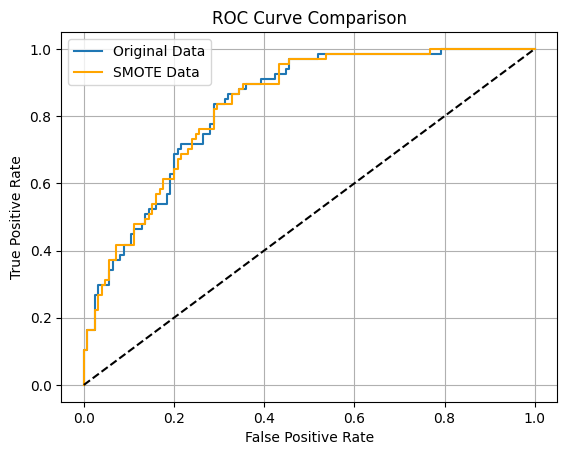

In [18]:
# Etapa 17: Curvas ROC
from sklearn.metrics import roc_curve

y_prob_original = model_original.predict_proba(x_test_scaled)[:, 1]
y_prob_smote = model_smote.predict_proba(x_test_scaled)[:, 1]

fpr_orig, tpr_orig, _ = roc_curve(y_test, y_prob_original)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_prob_smote)

plt.plot(fpr_orig, tpr_orig, label='Original Data')
plt.plot(fpr_smote, tpr_smote, label='SMOTE Data', color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()